## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_mouse_study_df = mouse_study_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen")

mean = grouped_mouse_study_df.mean()
median = grouped_mouse_study_df.median()

summary_stat_df = pd.merge(mean, median, on = "Drug Regimen", suffixes = ["Mean", 'Median'])



In [5]:
summary_stat_df = pd.merge(mean, median, on = "Drug Regimen", suffixes = ["Mean", 'Median'])
summary_stat_df.head()

,Tumor Volume (mm3)Mean,Tumor Volume (mm3)Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285


In [7]:
variance = grouped_mouse_study_df.var()
standard_dev = grouped_mouse_study_df.std()

var_std_df = pd.merge(variance, standard_dev, on ="Drug Regimen", suffixes = ["Variance", "Standard Deviation"])
summary_stat_df2 = pd.merge(summary_stat_df, var_std_df, on = "Drug Regimen")
summary_stat_df2.head()

,Tumor Volume (mm3)Mean,Tumor Volume (mm3)Median,Tumor Volume (mm3)Variance,Tumor Volume (mm3)Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708


In [8]:
sem =  grouped_mouse_study_df.sem()

summary_stat_df3 = pd.merge(summary_stat_df2, sem, on ="Drug Regimen")
summary_stat_df3.rename(columns = {"Tumor Volume (mm3)" :"Tumor Volume (mm3) SEM"}, inplace = True)

summary_stat_df3

,Tumor Volume (mm3)Mean,Tumor Volume (mm3)Median,Tumor Volume (mm3)Variance,Tumor Volume (mm3)Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
barplot_df1 = mouse_study_df["Drug Regimen"].value_counts()
barplot_df1

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

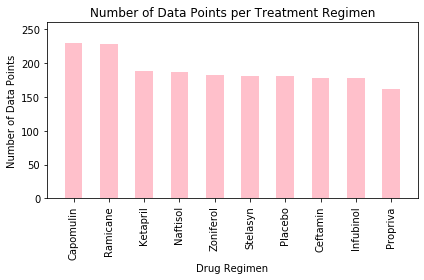

In [13]:
barplot_df1.plot(kind = "bar", color = "pink", title = "Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()

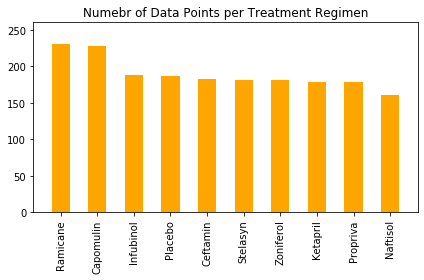

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(mouse_study_df["Drug Regimen"].unique(), mouse_study_df["Drug Regimen"].value_counts(), color = "orange", align ="center",width = 0.5) 
plt.xticks(rotation = "vertical")
plt.title("Numebr of Data Points per Treatment Regimen")
plt.xlim(-0.75, 9.75)
plt.ylim(0, 260)
plt.tight_layout()
plt.show()

In [22]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

pieplot_df1 = mouse_study_df["Sex"].value_counts()
pieplot_df1

Male      958
Female    935
Name: Sex, dtype: int64

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

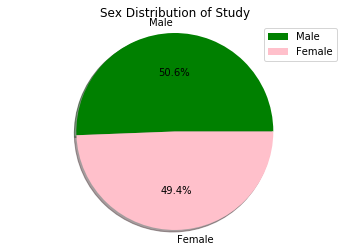

In [25]:
pieplot_df1.plot(kind ="pie", colors = ["green", "pink"], shadow = True, autopct = "%1.1f%%",
                title = "Sex Distribution of Study")
plt.legend(loc= "best")
plt.ylabel("")
plt.axis("equal")

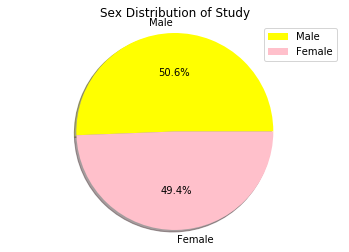

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_df["Sex"].value_counts(), labels = mouse_study_df["Sex"].unique(), colors =["yellow","pink"], shadow = True, autopct = "%1.1f%%")

plt.title("Sex Distribution of Study")
plt.legend(loc ="best")
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

final_tp_df1 = mouse_study_df.reset_index()
final_tp_df1

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1888,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
final_tp_df2 = final_tp_df1.loc[:,[ "index", "Mouse ID", "Timepoint"]]
final_tp_df2

,index,Mouse ID,Timepoint
0,0,k403,0
1,1,k403,5
2,2,k403,10
3,3,k403,15
4,4,k403,20
...,...,...,...
1888,1888,z969,25
1889,1889,z969,30
1890,1890,z969,35
1891,1891,z969,40


In [35]:
final_tp_df2["index"] = final_tp_df2["index"].astype(str)
final_tp_df2

,index,Mouse ID,Timepoint
0,0,k403,0
1,1,k403,5
2,2,k403,10
3,3,k403,15
4,4,k403,20
...,...,...,...
1888,1888,z969,25
1889,1889,z969,30
1890,1890,z969,35
1891,1891,z969,40


In [37]:
final_tp_df3 = final_tp_df2.groupby('Mouse ID').max()
final_tp_df3["index"] = final_tp_df3["index"].astype(int)
final_tp_df3.head()

,index,Timepoint
Mouse ID,,
a203,463,45
a251,473,45
a262,483,45
a275,493,45
a366,500,30


In [39]:
final_tp_df4 = mouse_study_df.reset_index()
del final_tp_df4["Timepoint"]
final_tp_df4.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,45.000000,0
1,1,k403,Ramicane,Male,21,16,38.825898,0
2,2,k403,Ramicane,Male,21,16,35.014271,1
3,3,k403,Ramicane,Male,21,16,34.223992,1
4,4,k403,Ramicane,Male,21,16,32.997729,1


In [40]:
final_tp_merge = pd.merge(final_tp_df3, final_tp_df4, on = "index", how = "left")
final_tp_merge.head()

,index,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,463,45,a203,Infubinol,Female,20,23,67.973419,2
1,473,45,a251,Infubinol,Female,21,25,65.525743,1
2,483,45,a262,Placebo,Female,17,29,70.717621,4
3,493,45,a275,Ceftamin,Female,20,28,62.999356,3
4,500,30,a366,Stelasyn,Female,16,29,63.440686,1


In [41]:
final_timepoints = final_tp_merge.loc[((mouse_study_df["Drug Regimen"] == "Capomulin") | \
                                       (mouse_study_df["Drug Regimen"] == "Ramicane") | \
                                       (mouse_study_df["Drug Regimen"] == "Infubinol") | \
                                       (mouse_study_df["Drug Regimen"] == "Ceftamin")), \
                                      ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_timepoints.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686


In [42]:
quartiles = final_timepoints["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

outliers = final_timepoints.loc[(final_timepoints["Tumor Volume (mm3)"] < lowerbound) | \
                                final_timepoints["Tumor Volume (mm3)"] > upperbound,:]
if len(outliers) > 0:
    print("There are potential outliers")
else:
    print("There are no outliers.")

There are no outliers.


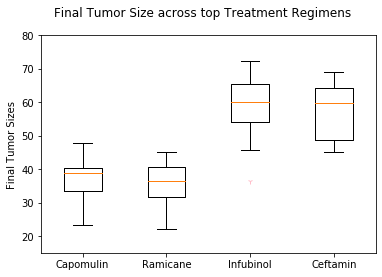

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Capomulin",["Tumor Volume (mm3)"]]
Ramicane = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Ramicane",["Tumor Volume (mm3)"]]
Infubinol = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Infubinol",["Tumor Volume (mm3)"]]
Ceftamin = final_timepoints.loc[final_timepoints["Drug Regimen"] == "Ceftamin",["Tumor Volume (mm3)"]]

top_regimens = [Capomulin["Tumor Volume (mm3)"], Ramicane["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"],
                Ceftamin["Tumor Volume (mm3)"]]

red_tri = dict(markerfacecolor="pink", markeredgecolor= "pink", marker= "1")


fig, ax1 = plt.subplots(sharey=True)
fig.suptitle("Final Tumor Size across top Treatment Regimens")


ax1.boxplot(top_regimens, flierprops=red_tri)
ax1.set_ylabel("Final Tumor Sizes")
ax1.set(xticklabels=["Capomulin", "Ramicane","Infubinol", "Ceftamin"])
ax1.set_ylim(15, 80)
            
plt.show()


## Line and scatter plots

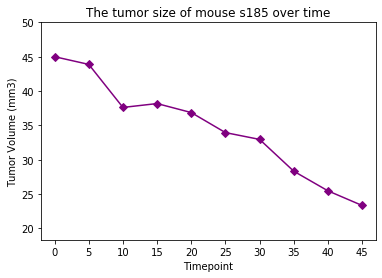

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                           ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# mouse_id = input(f"Which mouse would you like to look for? {mouse['Mouse ID'].unique()} ")
mouse_id = "s185"

mouse = mouse.loc[mouse["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], color = "purple", marker="D")
plt.title(f"The tumor size of mouse {mouse_id} over time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.xlim(-2, 47)
plt.ylim(min(mouse["Tumor Volume (mm3)"])-5, max(mouse["Tumor Volume (mm3)"])+5)
plt.xticks(np.arange(0,50,5))

plt.show()

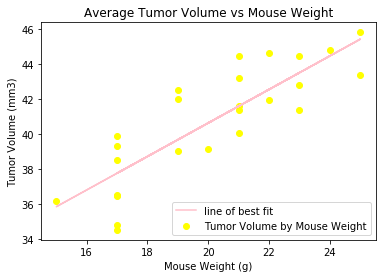

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",
                                  ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight = mouse_weight.groupby("Mouse ID").mean()


plt.scatter(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"], marker='o', color='yellow', label="Tumor Volume by Mouse Weight")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
regress_value = slope * mouse_weight["Weight (g)"] + intercept
plt.plot(mouse_weight["Weight (g)"], regress_value, color="pink", label="line of best fit")
plt.legend(loc="best")

plt.show()

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight["Weight (g)"], mouse_weight["Tumor Volume (mm3)"])
round(correlation[0],2)

0.84